# Heart Disease Prediction – Cleveland Dataset

This project builds a machine learning model to predict whether a patient has heart disease based on medical attributes.


## Dataset Description

The dataset contains clinical and demographic features of patients.
The target variable indicates whether the patient has heart disease (1) or not (0).

Source: UCI Machine Learning Repository – Heart Disease Dataset


## Exploratory Data Analysis (EDA)

In this section, we explore the dataset structure, check for missing values,
and visualize relationships between features and the target variable.


In [ ]:
#Importing libraries needed

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("data/heart_cleveland_upload.csv")

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
#Checking missing values

df.isnull().sum().sort_values(ascending=False)

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


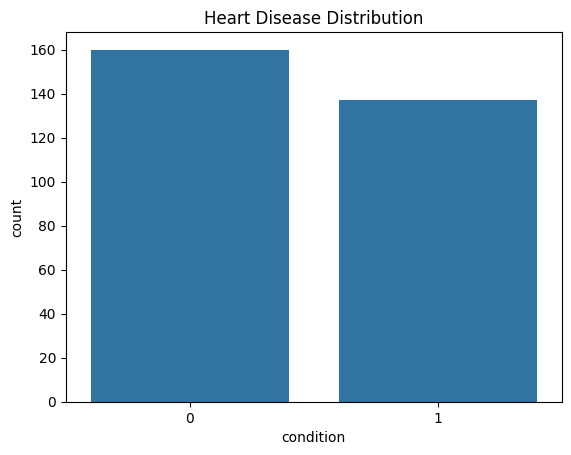

In [ ]:
sns.countplot(x='condition', data=df)
plt.title('Heart Disease Distribution')
plt.show()

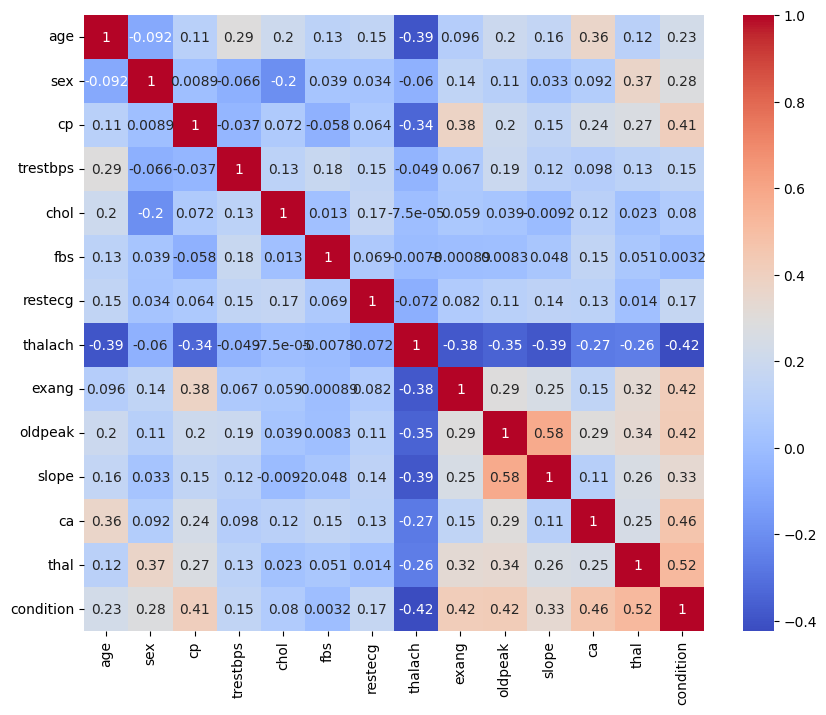

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Preprocessing

We perform feature scaling and prepare the dataset for modeling.
Scaling is necessary because features are measured on different scales.


In [ ]:
# Separating Features and Target

x = df.drop('condition', axis =1)
y = df['condition']

# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

## Model Implementation

We use Logistic Regression as a baseline model and Random Forest as an ensemble method.


In [ ]:
# Train Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



## Model Evaluation

We evaluate model performance using accuracy, precision, recall, and F1-score.


In [ ]:
# Evaluate Random Forest

from sklearn.metrics import classification_report, confusion_matrix

y_pred_rf = rf.predict(x_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
[[22 10]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



The Random Forest model achieved an accuracy of 70%. The recall for heart disease cases was 71%, meaning the model correctly identifies 71% of patients who actually have heart disease. Precision and recall are relatively balanced across both classes, indicating stable classification performance. However, overall accuracy remains moderate, suggesting that further hyperparameter tuning could improve performance.